<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar dataset diretamente do Github, selecionar colunas de interesse e tratar os dados**
Informações sobre o dataset: https://github.com/owid/covid-19-data/tree/master/public/data

Obs: sistema de separação de milhar e decimal em inglês

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Base de dados
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
#Data do primeiro e último registro
print(f'Primeiro registro: {df.date.min()}')
print(f'Última atualização: {df.date.max()}')


Primeiro registro: 2020-01-01
Última atualização: 2022-11-13


<h2>Selecionar colunas de interesse</h2>

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
columns_final = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 
                 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred', 
                 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population']

df.drop(columns=df.columns.difference(columns_final), inplace = True)

df.head()

,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


<h2>Tratar dados</h2>

In [6]:
#Substituir valores NaN por zero
df.fillna(df[['total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 
              'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population']].fillna(0), inplace = True)

df.head()

,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0


In [7]:
#Converter float para int
df[['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']] = df[['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 
                                                                                                                                             'people_vaccinated', 'people_fully_vaccinated', 'population']].astype(int)

In [8]:
df.head()

,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
1,Asia,Afghanistan,2020-02-25,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
2,Asia,Afghanistan,2020-02-26,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
3,Asia,Afghanistan,2020-02-27,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772
4,Asia,Afghanistan,2020-02-28,5,0,0.122,0.0,0,0.0,0,0,0,0.0,0.0,0.0,41128772


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234734 entries, 0 to 234733
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            221489 non-null  object 
 1   location                             234734 non-null  object 
 2   date                                 234734 non-null  object 
 3   total_cases                          234734 non-null  int64  
 4   total_deaths                         234734 non-null  int64  
 5   total_cases_per_million              234734 non-null  float64
 6   total_deaths_per_million             234734 non-null  float64
 7   total_tests                          234734 non-null  int64  
 8   total_tests_per_thousand             234734 non-null  float64
 9   total_vaccinations                   234734 non-null  int64  
 10  people_vaccinated                    234734 non-null  int64  
 11  people_fully_

Serão excluídos das análises os países que não reportaram os números de casos e de vacinação

In [10]:
#Localizar países que não reportaram o número de casos de covid-19
df[['location', 'total_cases']].groupby('location').max().sort_values(by = 'total_cases').head(30)

,total_cases
location,
England,0
Turkmenistan,0
Niue,0
Jersey,0
United States Virgin Islands,0
Scotland,0
Northern Cyprus,0
Sint Maarten (Dutch part),0
Tokelau,0


In [11]:
#Verificar os dados dos países que apresentam baixos números de casos ou nenhum
df[['location', 'total_cases']].loc[df.location.isin(['England', 'Puerto Rico', 'Turkmenistan', 'Niue', 'Jersey', 'United States Virgin Islands', 'Scotland', 'Northern Cyprus',
                                         'Sint Maarten (Dutch part)', 'Tokelau', 'Northern Ireland', 'Puerto Rico', 'Northern Mariana Islands', 'Guernsey', 'Guam', 
                                         'Western Sahara', 'Pitcairn', 'Wales', 'North Korea', 'Vatican', 'Tuvalu', 'Macao', 'Montserrat'])].groupby('location').describe()

total_cases                                     \
                                   count        mean         std  min   25%   
location                                                                      
England                            965.0    0.000000    0.000000  0.0   0.0   
Guam                               829.0    0.000000    0.000000  0.0   0.0   
Guernsey                           535.0    0.000000    0.000000  0.0   0.0   
Jersey                             603.0    0.000000    0.000000  0.0   0.0   
Macao                             1027.0  150.085686  242.679279  1.0  46.0   
Montserrat                         971.0  259.231720  448.127015  1.0  13.0   
Niue                               408.0    0.000000    0.000000  0.0   0.0   
North Korea                        913.0    0.201533    0.401365  0.0   0.0   
Northern Cyprus                    317.0    0.000000    0.000000  0.0   0.0   
Northern Ireland                   984.0    0.000000    0.000000  0.0   0.0   
Northern Mariana Islands           610.0    0.000000    0.000000  0.0   0.0   
Pitcairn                           441.0    0.000000    0.000000  0.0   0.0   
Puerto Rico                        840.0    0.000000    0.000000  0.0   0.0   
Scotland                           976.0    0.000000    0.000000  0.0   0.0   
Sint Maarten (Dutch part)          547.0    0.000000    0.000000  0.0   0.0   
Tokelau                            491.0    0.000000    0.000000  0.0   0.0   
Turkmenistan                       554.0    0.000000    0.000000  0.0   0.0   
Tuvalu                             566.0    5.422261   17.792615  0.0   0.0   
United States Virgin Islands       818.0    0.000000    0.000000  0.0   0.0   
Vatican                            983.0   23.848423    7.506441  1.0  27.0   
Wales                              961.0    0.000000    0.000000  0.0   0.0   
Western Sahara                       1.0    0.000000         NaN  0.0   0.0   

                                                   
                               50%    75%     max  
location                                           
England                        0.0    0.0     0.0  
Guam                           0.0    0.0     0.0  
Guernsey                       0.0    0.0     0.0  
Jersey                         0.0    0.0     0.0  
Macao                         53.0   81.5   795.0  
Montserrat                    21.0  171.0  1403.0  
Niue                           0.0    0.0     0.0  
North Korea                    0.0    0.0     1.0  
Northern Cyprus                0.0    0.0     0.0  
Northern Ireland               0.0    0.0     0.0  
Northern Mariana Islands       0.0    0.0     0.0  
Pitcairn                       0.0    0.0     0.0  
Puerto Rico                    0.0    0.0     0.0  
Scotland                       0.0    0.0     0.0  
Sint Maarten (Dutch part)      0.0    0.0     0.0  
Tokelau                        0.0    0.0     0.0  
Turkmenistan                   0.0    0.0     0.0  
Tuvalu                         0.0    3.0   163.0  
United States Virgin Islands   0.0    0.0     0.0  
Vatican                       27.0   29.0    29.0  
Wales                          0.0    0.0     0.0  
Western Sahara                 0.0    0.0     0.0

In [12]:
#Remover os registros dos países que apresentam poucos ou nenhum caso até o 3° quartil (75% dos dias)
df = df[df.location.isin(['England', 'Puerto Rico', 'Turkmenistan', 'Niue', 'Jersey', 'United States Virgin Islands', 'Scotland', 'Northern Cyprus',
                                         'Sint Maarten (Dutch part)', 'Tokelau', 'Northern Ireland', 'Puerto Rico', 'Northern Mariana Islands', 'Guernsey', 'Guam', 
                                         'Western Sahara', 'Pitcairn', 'Wales', 'North Korea', 'Tuvalu', 'Vatican']) == False]

In [13]:
#Verificar os países que não reportaram os dados da vacinação
df[['location', 'total_vaccinations']].groupby('location').max().sort_values(by = 'total_vaccinations').head(30)

,total_vaccinations
location,
Eritrea,0
Marshall Islands,0
International,0
Micronesia (country),0
Saint Pierre and Miquelon,0
Palau,0
Falkland Islands,4407
Montserrat,4564
Saint Helena,7892


In [14]:
#Remover os registros dos países que não apresentaram dados da vacinação
df = df[df.location.isin(['Eritrea', 'Marshall Islands', 'Saint Pierre and Miquelon', 'Palau']) == False]



---


# **Análises**


---



# **Número de casos, mortes e relação caso-fatalidade por continente**


In [15]:
#Selecionar os dados de interesse para analisar os números por continente
df_continents = df[['location','total_cases', 'total_deaths', 'total_vaccinations']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]
df_continents = df_continents.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max().sort_values(by = 'location')

In [16]:
#Calcular a relação caso-fatalidade
df_continents['case_fatality_ratio'] = ((df_continents['total_deaths']/df_continents['total_cases']) * 100).round(2)

In [17]:
df_continents

,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
location,,,,
Africa,12399851,257071,680614639,2.07
Asia,191561847,1497422,8790400043,0.78
Europe,237771936,1970492,1346857714,0.83
North America,116083477,1530566,1108226583,1.32
Oceania,12770351,20845,80369294,0.16
South America,64481910,1333538,929998710,2.07


In [18]:
#Converter o índice 'location' em coluna, resetar e dropar o índice anterior e depois reordenar as colunas
df_continents['continent'] = df_continents.index
df_continents.reset_index(drop = True, inplace = True)
df_continents = df_continents[['continent', 'total_cases', 'total_deaths', 'total_vaccinations', 'case_fatality_ratio']] 

In [19]:
#Tabela com todos os valores do gráfico a seguir:
df_continents

,continent,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
0,Africa,12399851,257071,680614639,2.07
1,Asia,191561847,1497422,8790400043,0.78
2,Europe,237771936,1970492,1346857714,0.83
3,North America,116083477,1530566,1108226583,1.32
4,Oceania,12770351,20845,80369294,0.16
5,South America,64481910,1333538,929998710,2.07


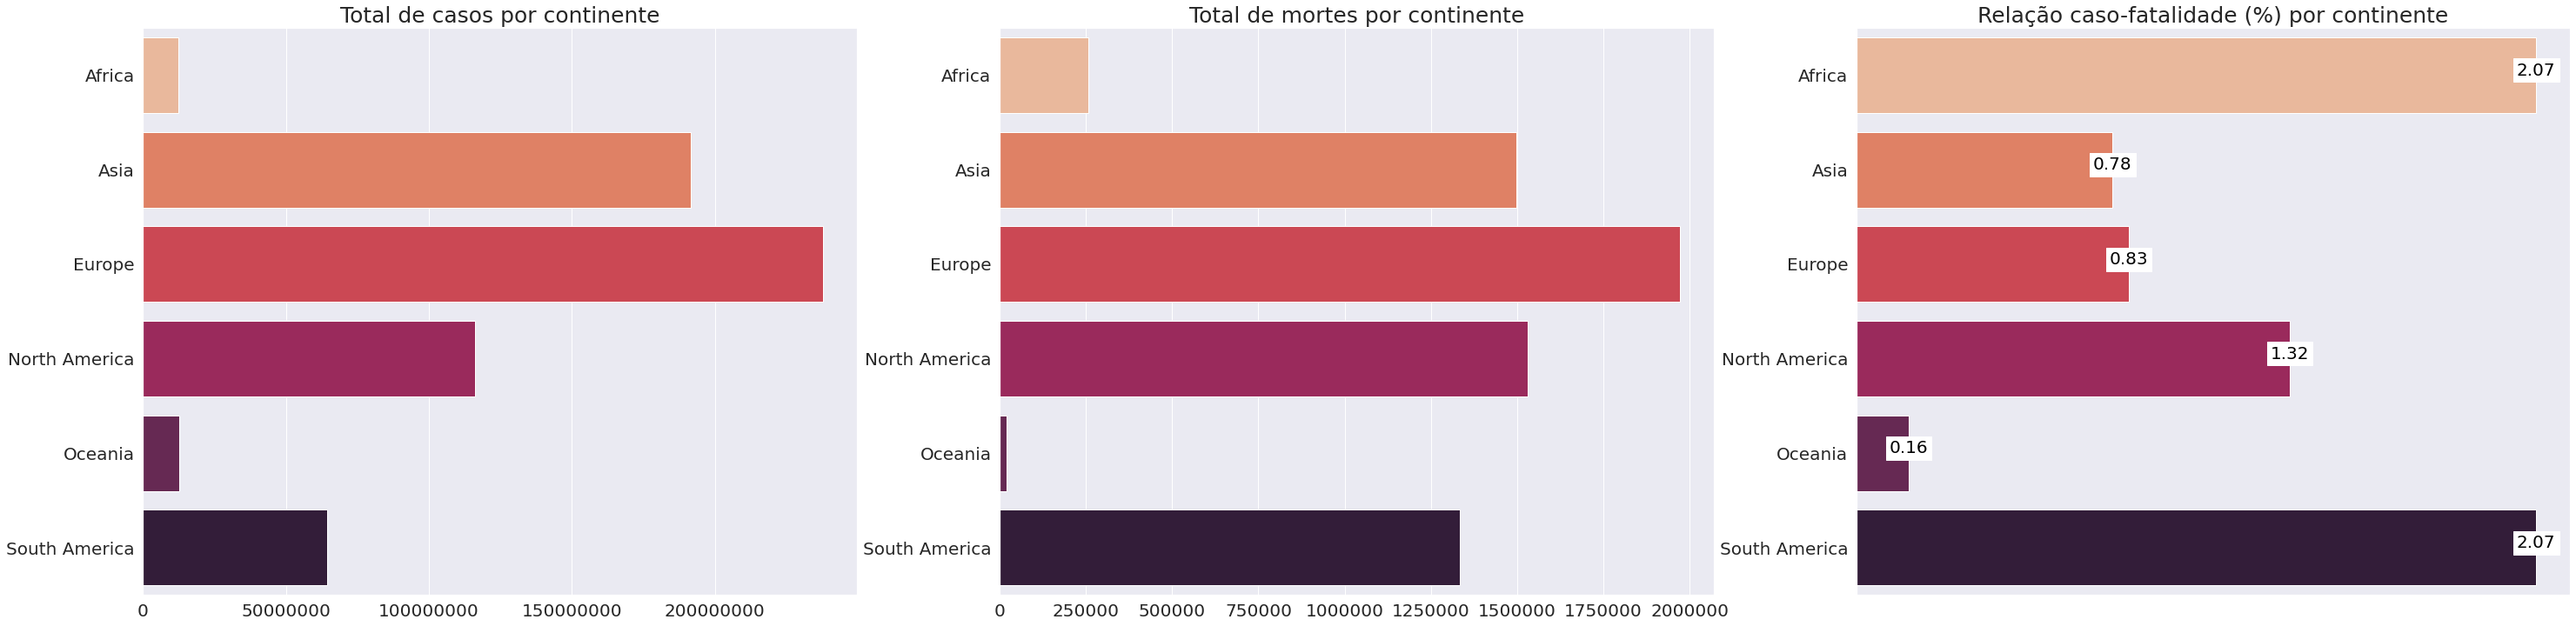

In [46]:
#Gráficos
sns.set_theme(style = "dark")
fig, ax = plt.subplots(1, 3, figsize = (50,12))

ax[0].ticklabel_format(style='plain') #remover notação científica
ax[1].ticklabel_format(style='plain') #remover notação científica
ax[2].ticklabel_format(style='plain') #remover notação científica

ax[0].set_title('Total de casos por continente', fontsize = 25)
ax[0] = sns.barplot(data = df_continents, x = df_continents['total_cases'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis ='x', labelsize= 20)
ax[0].tick_params(axis ='y', labelsize= 20)
ax[0].xaxis.grid()

ax[1].set_title('Total de mortes por continente', fontsize = 25)
ax[1] = sns.barplot(data = df_continents, x = df_continents['total_deaths'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis ='x', labelsize= 20)
ax[1].tick_params(axis ='y', labelsize= 20)
ax[1].xaxis.grid()

ax[2].set_title('Relação caso-fatalidade (%) por continente', fontsize = 25)
ax[2] = sns.barplot(data = df_continents, x = df_continents['case_fatality_ratio'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[2])
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis ='y', labelsize= 20)

x_axis = ax[2].axes.get_xaxis()
x_axis.set_visible(False)

for p in ax[2].patches:
  _x = p.get_x() + p.get_width() 
  _y = p.get_y() + p.get_height() / 2
  value = float(p.get_width())
  ax[2].text(_x, _y, value, ha = "center",
  fontsize = 20,
  color = 'black',
  backgroundcolor = 'white')

plt.show()

In [21]:
#Tabela resumo
df_continents[['total_cases', 'total_deaths', 'total_vaccinations', 'case_fatality_ratio']].applymap(lambda x: "{:,}".format(x))

,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
0,"12,399,851","257,071","680,614,639",2.07
1,"191,561,847","1,497,422","8,790,400,043",0.78
2,"237,771,936","1,970,492","1,346,857,714",0.83
3,"116,083,477","1,530,566","1,108,226,583",1.32
4,"12,770,351","20,845","80,369,294",0.16
5,"64,481,910","1,333,538","929,998,710",2.07


# **Ranking com os 10 países que apresentaram mais mortes por covid-19, em termos absolutos e relativos**

<h3>Encontrar o número de mortes por país, em termos absolutos</h3>

In [22]:
df.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10)

location
World                  6609926
High income            2721703
Upper middle income    2500222
Europe                 1970492
North America          1530566
Asia                   1497422
Lower middle income    1340223
South America          1333538
European Union         1167661
United States          1074524
Name: total_deaths, dtype: int64

<h3>É necessário remover valores que não pertencem a um único país</h3>

In [23]:
#Remover valores que não pertencem a um único país e visualizar o ranking
df_ranking = df.loc[df.location.isin(['High income', 'Asia', 'Upper middle income', 'Europe', 'Africa', 'North America', 'Lower middle income', 'South America', 'European Union','Oceania', 'Low income', 'International', 'Micronesia (country)']) == False] 
deaths_vAbsolute = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_vAbsolute = pd.DataFrame(deaths_vAbsolute)
deaths_vAbsolute

,total_deaths
location,
United States,"1,074,524"
Brazil,"688,656"
India,"530,532"
Russia,"383,134"
Mexico,"330,430"
Peru,"217,192"
United Kingdom,"210,680"
Italy,"179,985"
Indonesia,"159,104"


<h3>Encontrar os 10 países que tiveram os maiores percentuais de mortes por covid-19 no mundo</h3>


In [24]:
#Selecionar valores para realizar o cálculo do valor percentual do total de mortes
world = df_ranking[['location', 'total_deaths']].loc[df_ranking.location == 'World'].max()

countries = df_ranking[['location', 'total_deaths']].loc[df_ranking.location != 'World'].groupby('location').max()

In [25]:
#Visualizar o ranking
percent_deaths = (countries.total_deaths/world.total_deaths).sort_values(ascending = False).head(10)
percent_deaths = pd.DataFrame(percent_deaths).rename(columns = {'total_deaths': '%total_deaths'})
percent_deaths["rank_total_deaths"] = percent_deaths['%total_deaths'].rank(ascending = False).map('{:0,.0f}'.format)
percent_deaths["%total_deaths"] = percent_deaths['%total_deaths'].map('{:0,.2%}'.format)
percent_deaths

,%total_deaths,rank_total_deaths
location,,
United States,16.26%,1
Brazil,10.42%,2
India,8.03%,3
Russia,5.80%,4
Mexico,5.00%,5
Peru,3.29%,6
United Kingdom,3.19%,7
Italy,2.72%,8
Indonesia,2.41%,9


<h3>Ranquear os países mais populosos do mundo</h3>


In [26]:
rank_population = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['population'].max().sort_values(ascending = False)
rank_population = pd.DataFrame(rank_population)
rank_population["population_rank"] = rank_population['population'].rank(ascending = False).map('{:0,.0f}'.format)
rank_population['population'] = rank_population['population'].map('{:0,.0f}'.format)
rank_population.head(10)

,population,population_rank
location,,
China,"1,425,887,360",1
India,"1,417,173,120",2
United States,"338,289,856",3
Indonesia,"275,501,344",4
Pakistan,"235,824,864",5
Nigeria,"218,541,216",6
Brazil,"215,313,504",7
Bangladesh,"171,186,368",8
Russia,"144,713,312",9


<h2>Tabela final</h2>

In [27]:
deaths_vAbsolute.merge(percent_deaths, on = 'location').merge(rank_population['population_rank'], on = 'location')

,total_deaths,%total_deaths,rank_total_deaths,population_rank
location,,,,
United States,"1,074,524",16.26%,1,3
Brazil,"688,656",10.42%,2,7
India,"530,532",8.03%,3,2
Russia,"383,134",5.80%,4,9
Mexico,"330,430",5.00%,5,10
Peru,"217,192",3.29%,6,44
United Kingdom,"210,680",3.19%,7,22
Italy,"179,985",2.72%,8,25
Indonesia,"159,104",2.41%,9,4


## Ranking com os 10 países que apresentaram mais mortes por covid-19 a cada  milhão de habitantes

Obs: sistema de separação de milhar em inglês

In [28]:
deaths_per_million = df_ranking.groupby('location')['total_deaths_per_million'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_per_million = pd.DataFrame(deaths_per_million)
deaths_per_million

,total_deaths_per_million
location,
Peru,"6,379"
Bulgaria,"5,596"
Bosnia and Herzegovina,"5,005"
Hungary,"4,827"
North Macedonia,"4,568"
Georgia,"4,517"
Montenegro,"4,446"
Croatia,"4,273"
Czechia,"3,975"


# **Ranking com os 10 países que apresentaram maior relação caso-fatalidade**

In [29]:
#Selecionar o último valor informado por cada país
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio = case_fatality_ratio.loc[(case_fatality_ratio['total_cases'] != 0) & (case_fatality_ratio['total_deaths'] != 0)] #Mantém apenas os países que possuem registos para número de casos ou de mortes

In [30]:
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio['case_fatality_ratio'] = round((case_fatality_ratio['total_deaths']/case_fatality_ratio['total_cases']) * 100, 2)
case_fatality_ratio['case_fatality_ratio'].sort_values(ascending = False).head(10)

location
Yemen                     18.07
Sudan                      7.83
Syria                      5.51
Peru                       5.21
Somalia                    4.99
Egypt                      4.81
Mexico                     4.64
Bosnia and Herzegovina     4.04
Afghanistan                3.83
Liberia                    3.68
Name: case_fatality_ratio, dtype: float64

## **Números da vacinação**

<h3>Números da vacinação por continente</h3>

In [31]:
data_vaccination = df[['location','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                       'people_fully_vaccinated_per_hundred']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]

df_vaccination = data_vaccination.groupby('location')[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
                                                       'people_fully_vaccinated_per_hundred']].max().sort_values(by = 'location').applymap(lambda x: "{:,}".format(x))
df_vaccination

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
location,,,,,,
Africa,"680,614,639","441,612,388","354,306,183",47.7,30.95,24.83
Asia,"8,790,400,043","3,624,779,937","3,398,994,669",186.18,76.77,71.99
Europe,"1,346,857,714","520,098,981","497,423,384",180.83,69.83,66.79
North America,"1,108,226,583","453,490,690","390,500,268",184.6,75.54,65.05
Oceania,"80,369,294","29,103,064","27,980,148",178.44,64.62,62.12
South America,"929,998,710","372,188,909","334,640,595",212.9,85.2,76.61


<h3>Ranking com os 10 países que tiveram o maior número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [32]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

location
Gibraltar               126.76
Qatar                   105.68
United Arab Emirates    103.72
Brunei                   99.26
Singapore                90.90
Chile                    90.23
Hong Kong                90.07
China                    89.22
Cuba                     89.18
Malta                    88.35
Name: people_fully_vaccinated_per_hundred, dtype: float64

<h3>Ranking com os 10 países que tiveram o menor número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [33]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(10)

location
Burundi                         0.18
Yemen                           2.01
Haiti                           2.04
Papua New Guinea                2.94
Democratic Republic of Congo    3.76
Cameroon                        4.61
Madagascar                      5.91
Senegal                         7.29
Syria                           9.51
Mali                            9.56
Name: people_fully_vaccinated_per_hundred, dtype: float64